# Лабораторная работа  6

Линейная Регрессия в sklearn

Выполнил: 6133, Борисов Д.С.

Ссылки на теорию: 
- https://habr.com/ru/company/ods/blog/323890/
- https://habr.com/ru/post/278513/
- https://habr.com/ru/post/279117/

0 Найти и загрузить датасет, подходящий для задачи регрессии. Набор данных должен содержать не только числовые, но и категориальные/бинарные признаки. Опишите данные, что обозначает каждый столбец, какого типа (категориальный, вещественный, целочисленный, бинарный) данный столбец, при необходимости для категориальных в том числе бинарных признаков привести расшифровку их значений.

## Star dataset to predict star types

A 6 class star dataset for star classification with Deep Learned approaches.

**Dataset Info:**

This is a dataset consisting of several features of stars.

Some of them are:

* __Integer__: Absolute Temperature **(in K)** - This column consists of the Surface temperatures of several stars
* __Real__: Relative Luminosity **(L/Lo)** - This column consists of the Luminosity of several stars calculated with respect to sun(L/Lo)
* __Real__: Relative Radius **(R/Ro)** - This column consists of the Radius of several stars calculated with respect to sun(R/Ro)
* __Real__: Absolute Magnitude **(Mv)** - This column consists of the Absolute Visual magnitude(Mv) of several stars
* __Categorical__: Star Color **(white,Red,Blue,Yellow,yellow-orange etc)** - This column contains the info about the colors of each star after Spectral Analysis
* __Categorical__: Spectral Class **(O,B,A,F,G,K,M)** - This column contains info about the spectral classes of each star(O,B,A,F,G,K,M) 
* __Categorical__: Star Type **(Red Dwarf, Brown Dwarf, White Dwarf, Main Sequence , SuperGiants, HyperGiants)** - This column is the output class (6 classes ranging from 0-5) 0 -> Brown Dwarf 1-> Red Dwarf 2 -> White Dwarf 3-> Main Sequence 4 -> Supergiant 5 -> Hypergiant

Lo = 3.828 x 10^26 Watts (Avg Luminosity of Sun)

Ro = 6.9551 x 10^8 m (Avg Radius of Sun)

In [1]:
from pandas import read_csv

In [2]:
dataset = read_csv('../data/Star_dataset.csv')
dataset

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,red,M
1,3042,0.000500,0.1542,16.60,0,red,M
2,2600,0.000300,0.1020,18.70,0,red,M
3,2800,0.000200,0.1600,16.65,0,red,M
4,1939,0.000138,0.1030,20.06,0,red,M
...,...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,5,blue,O
236,30839,834042.000000,1194.0000,-10.63,5,blue,O
237,8829,537493.000000,1423.0000,-10.73,5,white,A
238,9235,404940.000000,1112.0000,-11.23,5,white,A


In [3]:
# dataset = dataset[dataset['Star type'].isin([0, 1])].reset_index(drop=True)
# dataset.shape

1 Временно удалить категориальные / бинарные признаки, оставив только вещественные (потом вернёмся к ним позже).

In [4]:
cut_dataset = dataset.drop(columns=['Star color', 'Spectral Class'])
cut_dataset.shape

(240, 5)

In [5]:
cut_dataset

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type
0,3068,0.002400,0.1700,16.12,0
1,3042,0.000500,0.1542,16.60,0
2,2600,0.000300,0.1020,18.70,0
3,2800,0.000200,0.1600,16.65,0
4,1939,0.000138,0.1030,20.06,0
...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,5
236,30839,834042.000000,1194.0000,-10.63,5
237,8829,537493.000000,1423.0000,-10.73,5
238,9235,404940.000000,1112.0000,-11.23,5


2 Визуализировать heatmap-матрицу кореллированности признаков. См. [пример.](https://stackoverflow.com/questions/39409866/correlation-heatmap)

In [6]:
from seaborn import heatmap

<AxesSubplot:>

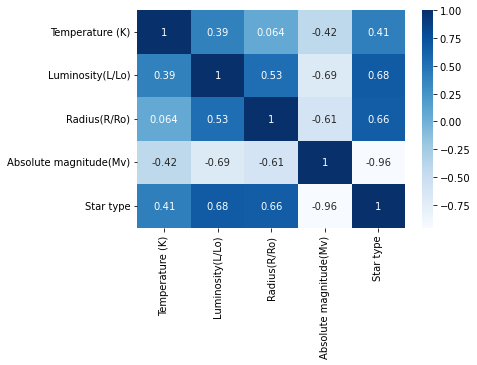

In [7]:
corr = cut_dataset.corr()
heatmap(corr, cmap="Blues", annot=True)

3 Визуализировать взаимосвязь между целевой переменной и каждым признаком (с помощью srs.pairplot или pandas.plotting.scatter_matrix или как-то ещё). Лучше всего, если будете строить диаграмму попарного распределения не между ВСЕМИ парами признаков, а только между признаками и целевой переменной. См. [пример.](https://stackoverflow.com/questions/31966494/compare-1-independent-vs-many-dependent-variables-using-seaborn-pairplot-in-an-h)


In [8]:
from seaborn import pairplot

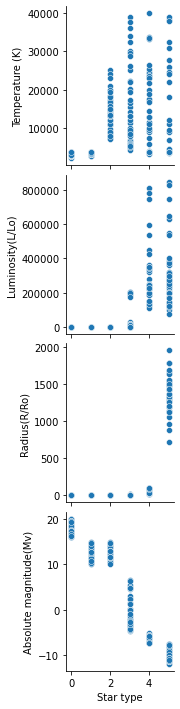

In [9]:
pairplot(data=cut_dataset, x_vars='Star type', y_vars=cut_dataset.columns.drop('Star type'))

4  Разделить набор данных на обучающую и тестовую выборки

In [10]:
cut_labels = cut_dataset['Star type']
cut_data = cut_dataset.drop(columns='Star type')

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(cut_data, cut_labels, test_size=0.3, random_state=123)

In [13]:
Xtrain.shape, Xtest.shape, Ytrain.shape, Ytest.shape

((168, 4), (72, 4), (168,), (72,))

**5 Линейная регрессия**

5.1 Обучить модель линейной регрессии (`LinearRegression`)

5.2 Вывести метрики MAE, MSE и R2 на обущающем и тестовом наборе

5.3 Вывести `model.coef_` и `model.intercept_`

5.4 Построить график (barh) с важностью коэфициентов при соответствующих признаках (строится точно так же, как мы строили графики для feature_importance в теме с деревьями). Желательно, чтобы сверху вниз шли коэффициенты по убыванию, а названия соответствующих признаков подписаны по вертикальной оси. 

In [14]:
from sklearn.linear_model import LinearRegression

In [15]:
lr_model = LinearRegression()

In [29]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from pandas import DataFrame

In [30]:
def common_report(model, Xtrain, Xtest, Ytrain, Ytest, get_info=False):
    model.fit(Xtrain, Ytrain)
    train_pred = model.predict(Xtrain)
    test_pred = model.predict(Xtest)

    print(f'Отчёт по классификации моделью {model}:')

    train_mae = mean_absolute_error(Ytrain, train_pred)
    train_mse = mean_squared_error(Ytrain, train_pred)
    train_r2 = r2_score(Ytrain, train_pred)
    test_mae = mean_absolute_error(Ytest, test_pred)
    test_mse = mean_squared_error(Ytest, test_pred)
    test_r2 = r2_score(Ytest, test_pred)
    
    print('------------- Метрики -------------')
    print(f'train MAE: {train_mae}\n test MAE: {test_mae}')
    print(f'train MSE: {train_mse}\n test MSE: {test_mse}')
    print(f'train R2: {train_r2}\n test R2: {test_r2}')

    print('------------- Атрибуты -------------')
    print(f'model.coef_: {model.coef_}')
    print(f'model.intercept_: {model.intercept_}')

    coef = DataFrame(data=model.coef_, index=Xtrain.columns, columns=['Features'])
    coef.sort_values(by='Features', ascending=False, inplace=True)
    coef.plot.barh(align='center')

    info = DataFrame({'model':[model, model], 
                    'MAE':[train_mae, test_mae], 
                    'MSE':[train_mse, test_mse], 
                    'R2':[train_r2, test_r2]}, index=['Train', 'Test'])

    return info if get_info else None

Отчёт по классификации моделью LinearRegression():
------------- Метрики -------------
train MAE: 0.3426826595000748
 test MAE: 0.43507194380690173
train MSE: 0.19724036910982992
 test MSE: 0.28502050517986155
train R2: 0.9334101414144038
 test R2: 0.8979595097477623
------------- Атрибуты -------------
model.coef_: [ 5.40083689e-06 -8.82221223e-08  3.92715324e-04 -1.43452412e-01]
model.intercept_: 2.9571203995655173


,model,MAE,MSE,R2
Train,LinearRegression(),0.342683,0.197240,0.93341
Test,LinearRegression(),0.435072,0.285021,0.89796


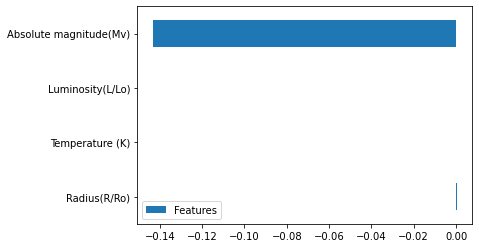

In [28]:
common_report(lr_model, Xtrain, Xtest, Ytrain, Ytest, get_info=True)

**6 Модель `Lasso`**

6.1 Обучить модель регрессии (`Lasso`), с помощью `GridSearchCV` подобрать параметр alpha, дальше работаем с лучшей моделью

6.1 Для лучшей модели вывести метрики MAE, MSE и R2 на обущающем и тестовом наборе

6.3 Для лучшей модели вывести `model.coef_` и `model.intercept_`

6.4 Для лучшей модели построить график (barh) с важностью коэфициентов при соответствующих признаках



**7 Модель Ridge**

7.1 Обучить модель регрессии (`Ridge`), с помощью `GridSearchCV`  подобрать параметр alpha, дальше работаем с лучшей моделью

7.2 Для лучшей модели вывести метрики MAE, MSE и R2 на обущающем и тестовом наборе

7.3 Для лучшей модели вывести model.coef_ и model.intercept_

7.4  Для лучшей модели построить график (barh) с важностью коэфициентов при соответствующих признаках

**8 Модель `ElasticNet`**

8.1 Обучить модель регрессии (ElasticNet), с помощью GridSearchCV подобрать параметры alpha и l1_ratio (в пределах 0:1), дальше работаем с лучшей моделью

8.2 Для лучшей модели вывести метрики MAE, MSE и R2 на обущающем и тестовом наборе

8.3 Для лучшей модели вывести model.coef_ и model.intercept_

8.4 Для лучшей модели построить график (barh) с важностью коэфициентов при соответствующих признаках

 9 Выбрать лучшую модель, указать значения MAE, MSE и R2 на тестовом наборе

10  Возвращаем категориальные / бинарные признаки на место в датасет, категориальные признаки преобразуем в набор бинарных через `pd.get_dummies( ..., drop_first = True )`. Обучаем лучшую модель.

11 Как изменились метрики MAE и MSE на тестовом наборе, вывести их и сделать выводы

12 Прогоняем датасет, который уже обогащён бинарными признаками, через StandardScaler, обучаем найденную на предыдущих шагах лучшую модель. Как изменились MAE, MSE и R2 на тестовом наборе, вывести метрики и сделать выводы. 

13 Построить график (barh) с важностью коэфициентов при соответствующих признаках для задания 12

**Замечания:** При использовании GridSearchCV для извлечения параметров лучшей модели используем атрибут с объектом лучшей модели: gs.best_estimator_, например извлекаем вектор коэффициентов: gs.best_estimator_.coef_

Логика всего задания проста:

- Ищем лучший регрессор на вещественных признаках

- Пробуем добавить категориальные (преобразованные в бинарные), смотрим как изменилось качество, стала ли модель лучше работать

- Нормализуем признаки через StandardScaler, смотрим, повлияло ли это на качество модели.